# Single-Point simulation at Bondville site

In the last tutorial note, we have gone through downloading and compiling the code. 

Now we can move in to running a single-point simulation with provided data from Bondville site in Illinois.

## 1. Single-point forcing directory

**cd HRLDAS_forcing/run/examples/**

**ls -l**
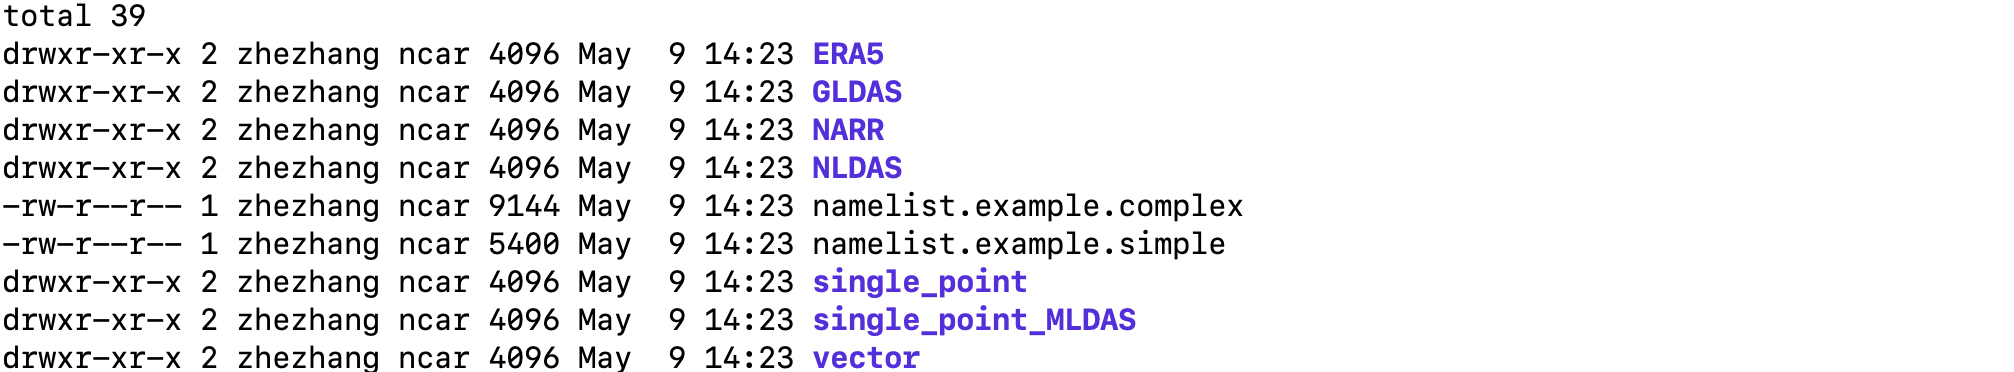

We will go into the **single_point** directory, as this directory contains one year forcing from the Bondville site in 1998.

**cd single_point**

**ls -l** 
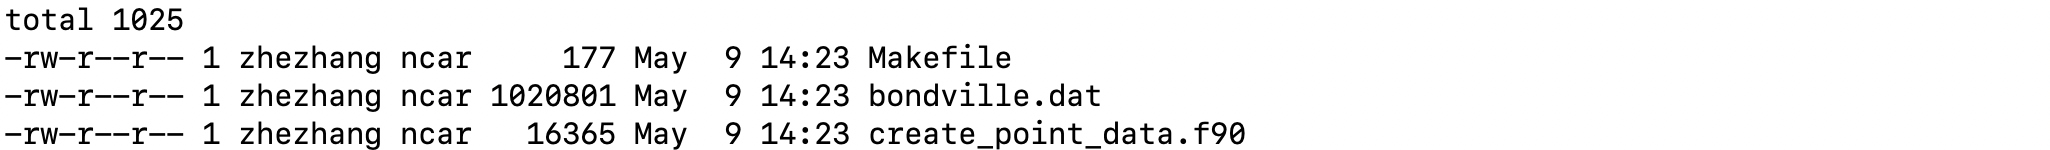

Three files are included in this directory: 

**Makefile** is the procedure used for making create_point_data executable, 

**bondville.dat** is the file containing single point data, and 

**create_point_data.f90** is the fortran code for creating forcing. 

Let's take a look at the **bondville.dat** format. 

## 2. Single-point data format
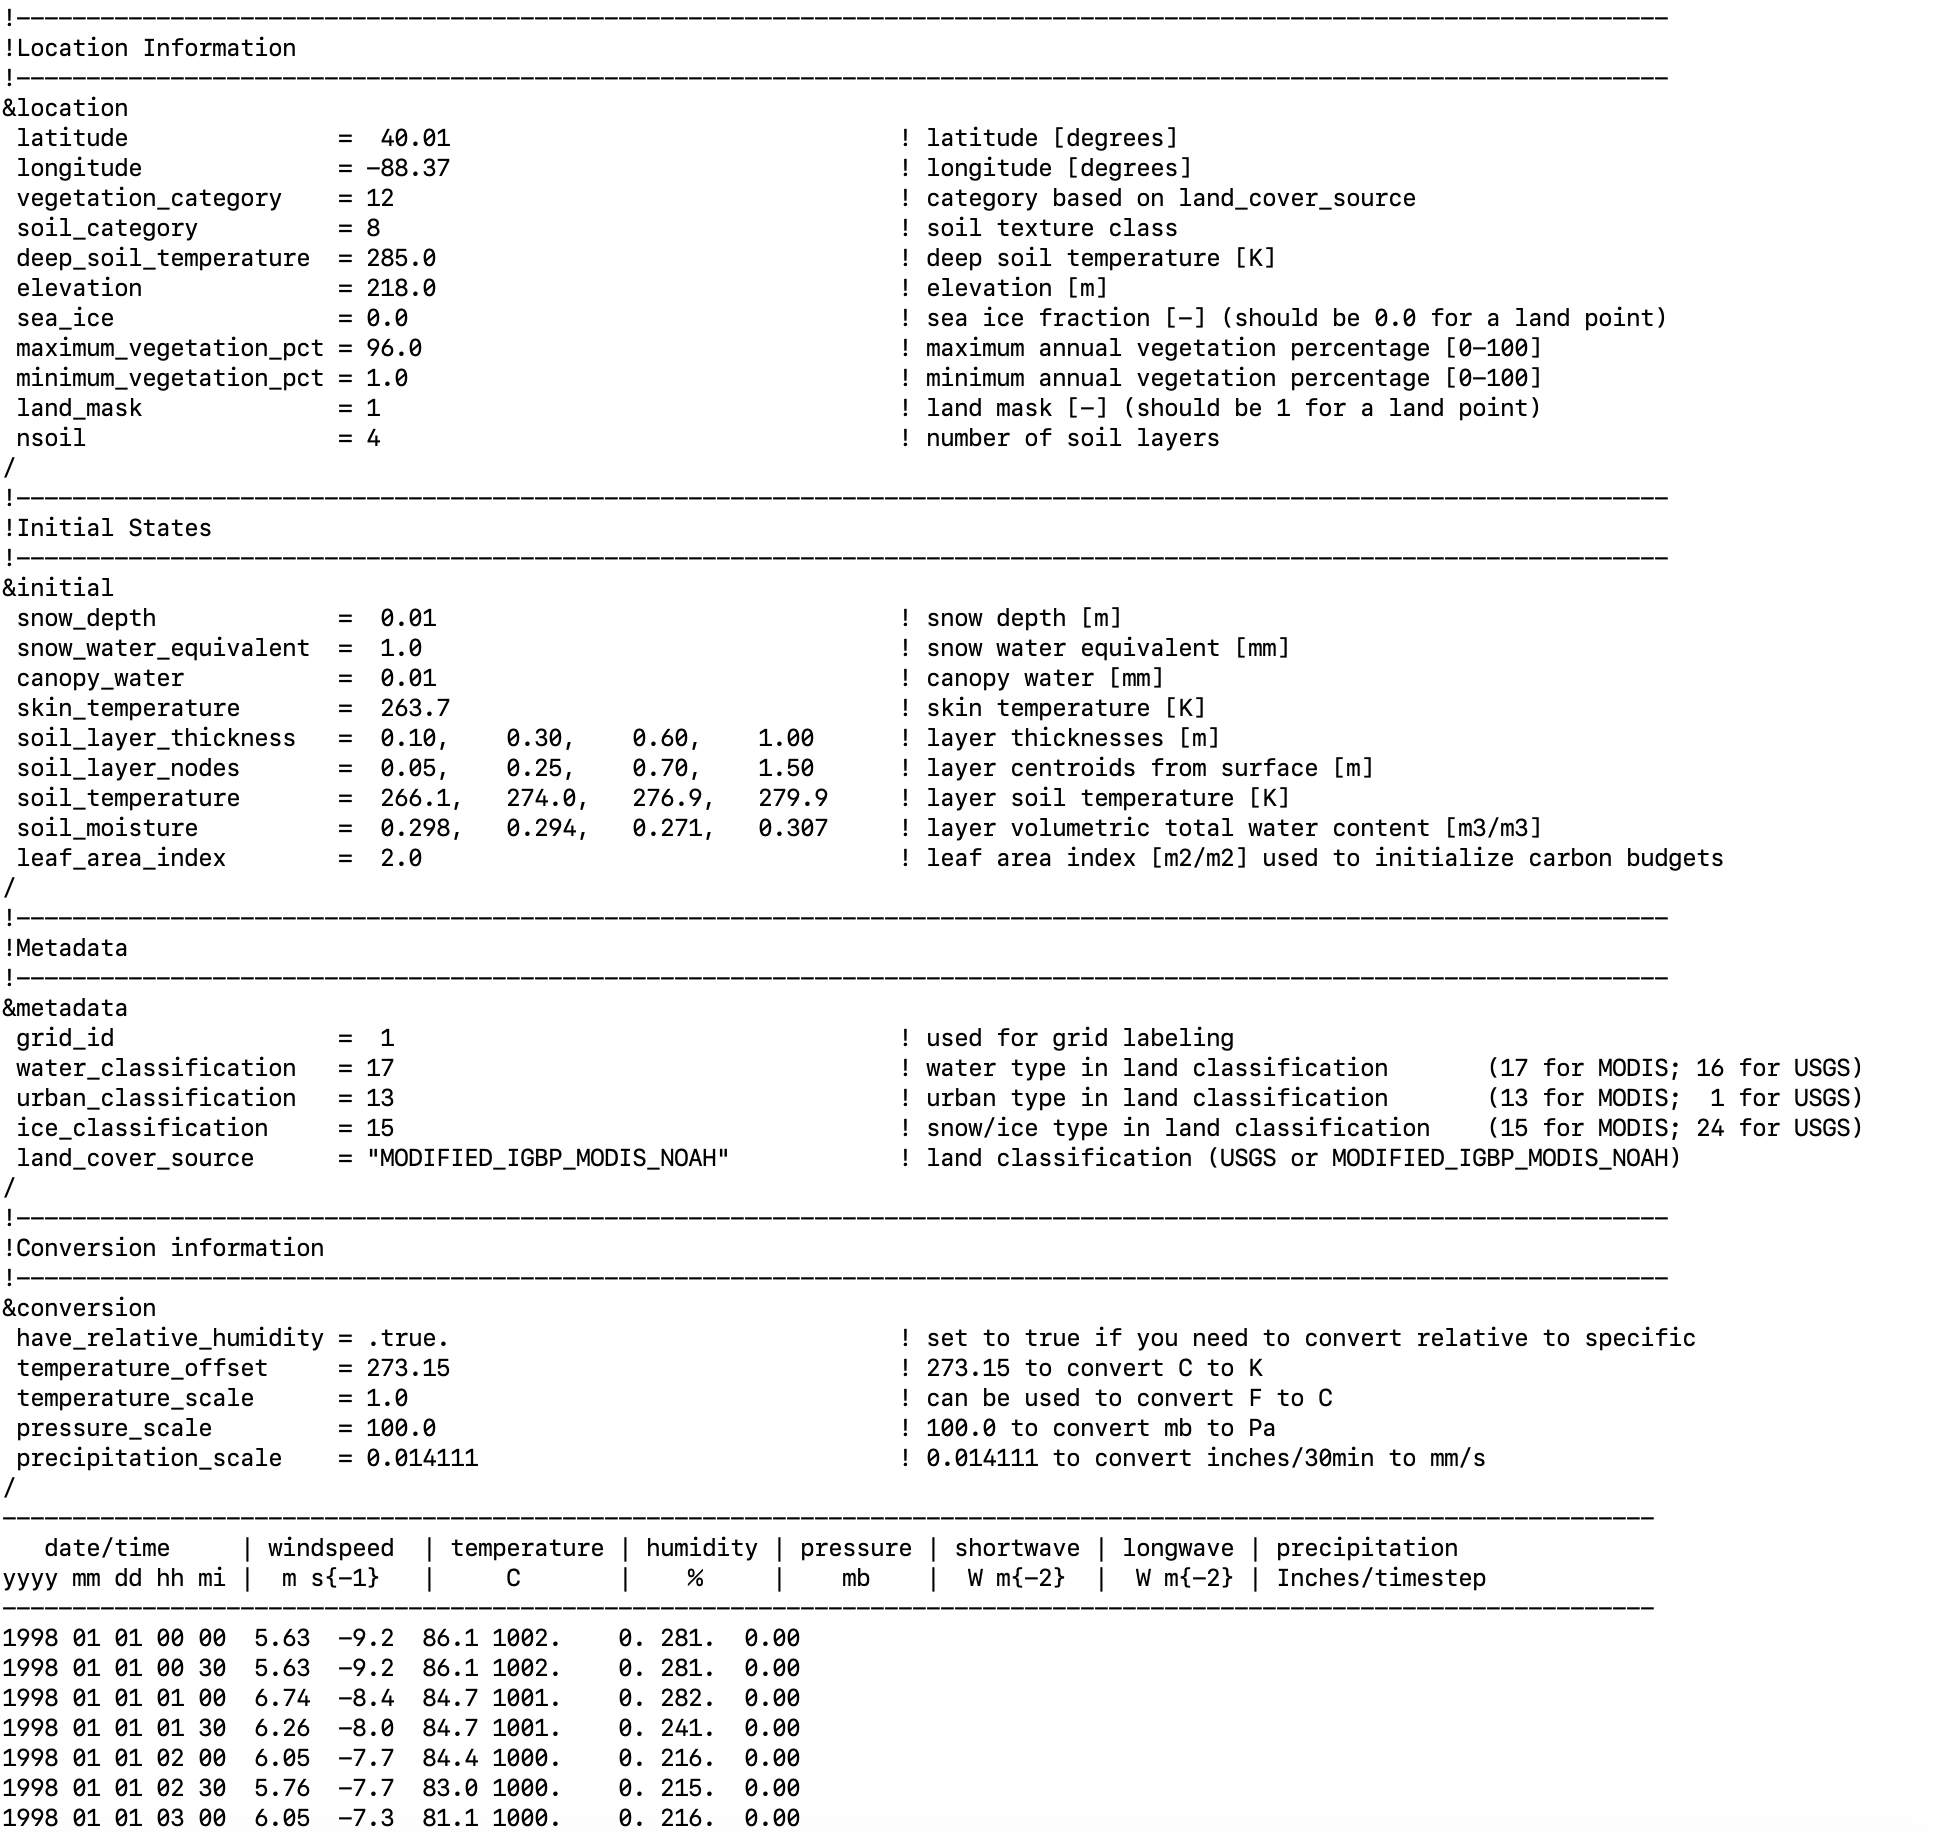
......

Here we can see four sections in the **bondville.dat** file:

**Location Information :** contains the lat/lon, landuse type, soil type, elevation information, etc.

**Initial States :** is about the initial conditions in this single-point, including soil moisture, soil temperature, snow water equivalent, skin temperature, LAI, etc.

**Metadata :** contains the landuse classification information, either "USGS" or "MODIS"

**Conversion information :** is used for converting units from observations to the required units model needs, which are shown in the data section. 

Then are the 30-min data from 1998 01 01, for 7 variables: windspeed, temperature, humidity, pressure, shortwave and longwave radiation, and precipitation. 

**Please Note:** for single-point simulation, the model needs data in **UTC** However, in the **bondville.dat** file, data are recorded in **local time**. 

Getting to understand the data format in this file will allow users to easily change data from other places around the world. 

## 3. Create single-point forcing

Now we can start to create single-point forcing. 

**make** command will compile the **create_point_data.exe** executable.

Then run **./create_point_data.exe**
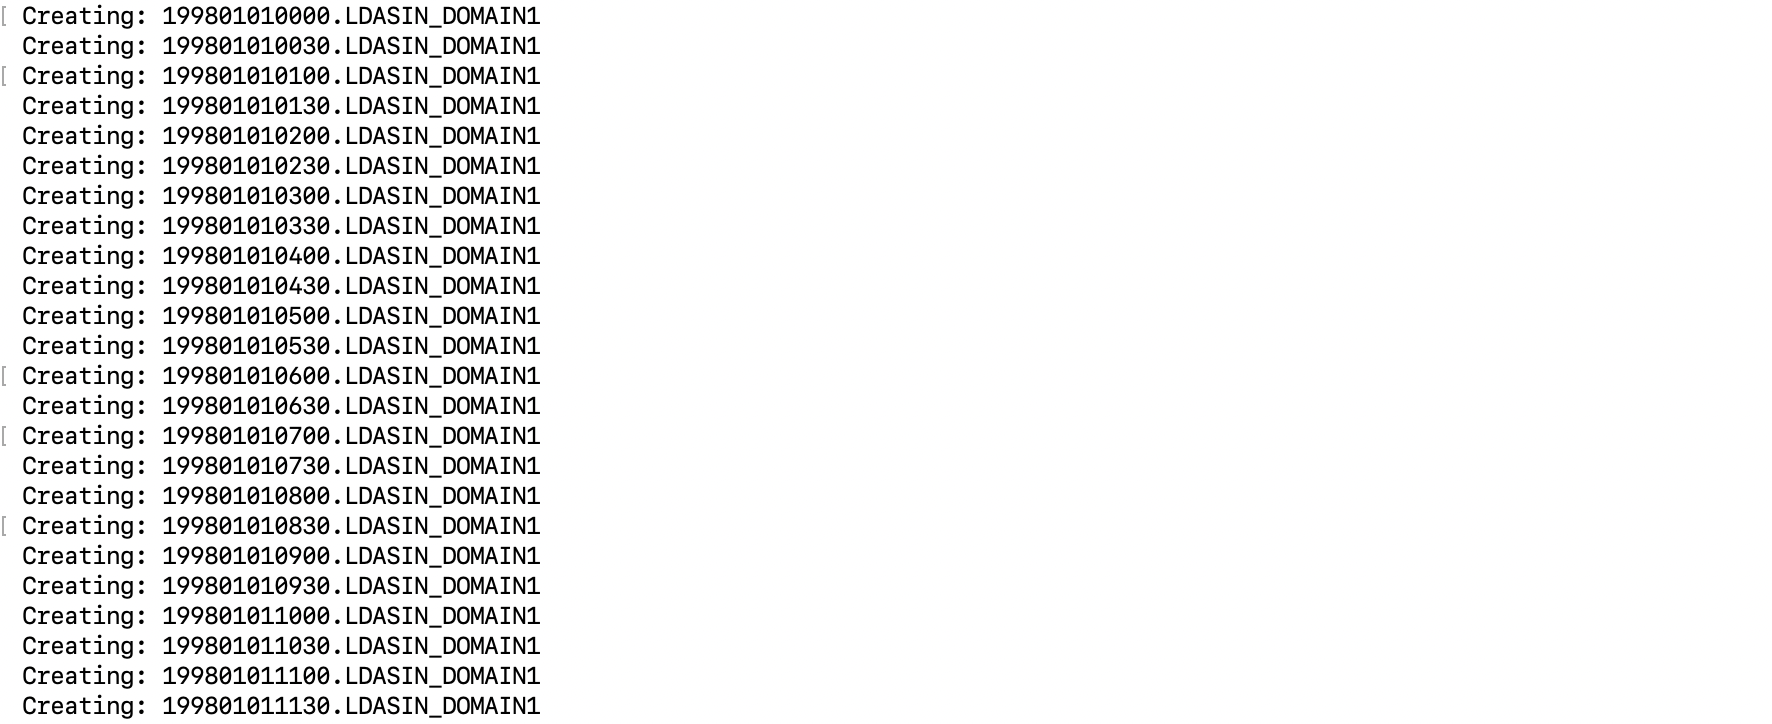
......

By the end of the program, we will have 30-min forcing data for Bondville site in 1998.

## 4. Edit namelist and run model

Now that we already have the 30-min forcing data, we can go to the **run** directory and edit **namelist** and start the model run.

**ls -l run**
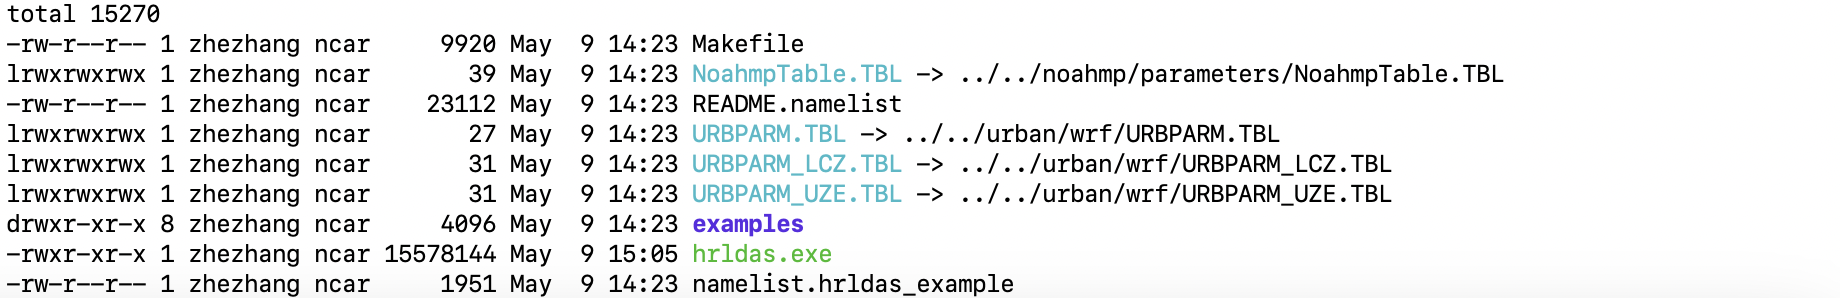


We can copy a namelist from one of the example directory and start editing:

**cp examples/single_point/namelist.hrldas.single_point namelist.hrldas**


(1) **Edit the path** of single-point forcing we have just created and output:
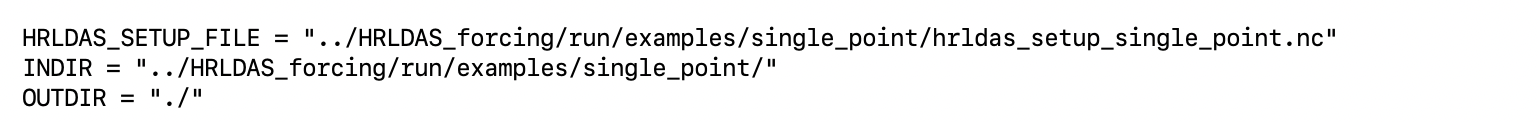

(2) **Simulation start time and run time** Uncomment the restart line, if it is a restart run. SPINUP_LOOPS is used for repeatedly running the same period, for a fast spinup option.
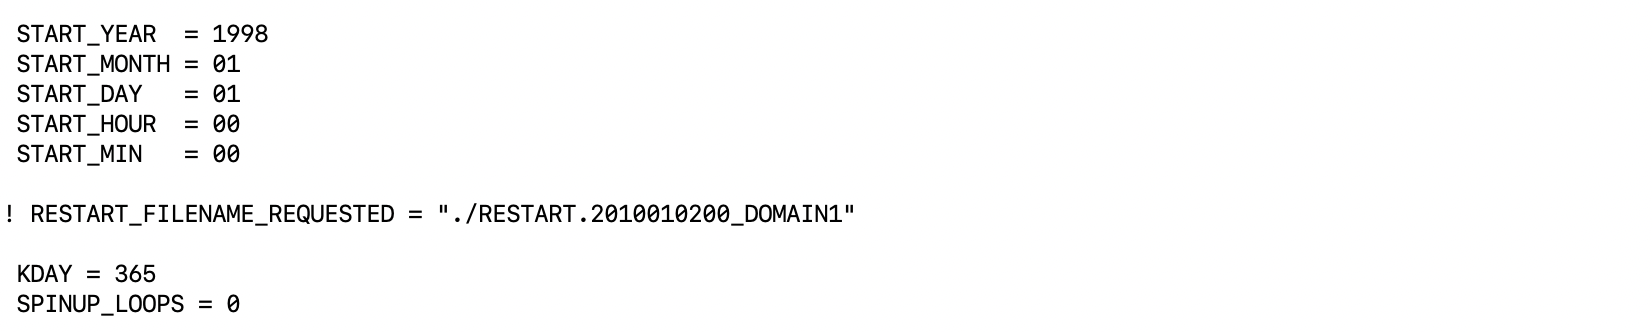

(3) **Forcing variable names** (usually conventional variable names, no need to change)
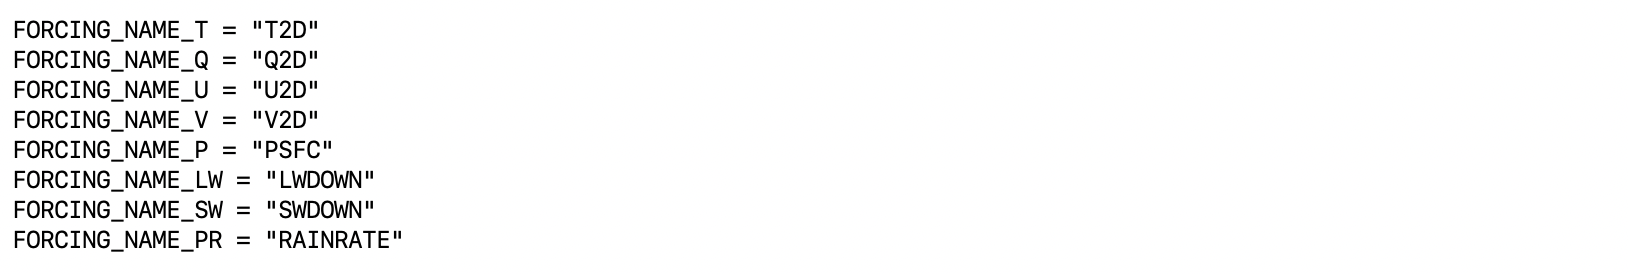

(4) **Model physcis options** (Modify this part for your application). Let's say change **CROP_OPTION = 1** for turning on the crop model:
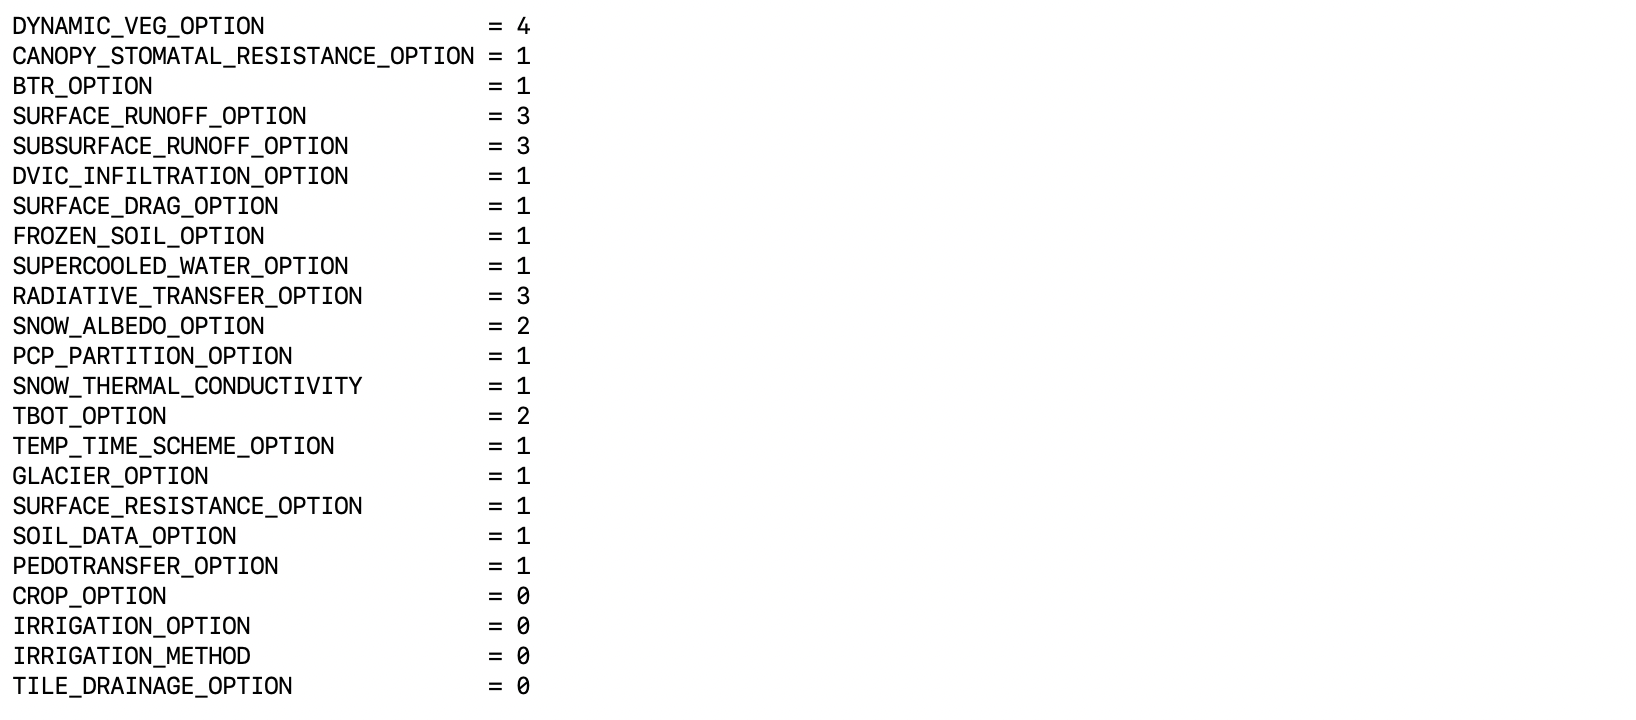

(5) **Timestep** for forcing and output. **FORCING_TIMESTEP** , **NOAH_TIMESTEP**, **OUTPUT_TIMESTEP** are in second. **SPLIT_OUTPUT_COUNT** put n output timestep together into one output file. **RESTART_FREQUENCY_HOURS** is in hour. 
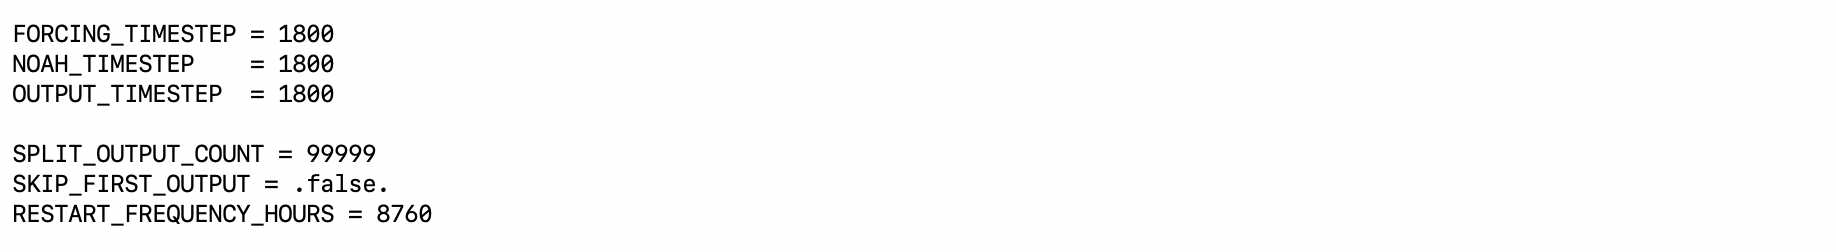

For this example, I make this number very large, so all 30-min output would be stored in one single output file.

(6) **Executing the model** 
For single-point, one-year simulation takes only about one minute at the login node:

**./hrldas.exe** (for 2D domain or longer simulation, we can submit job to cheyenne)

Now you would see the model successfully running on the login nodes and the runtime log are printed on the screen:
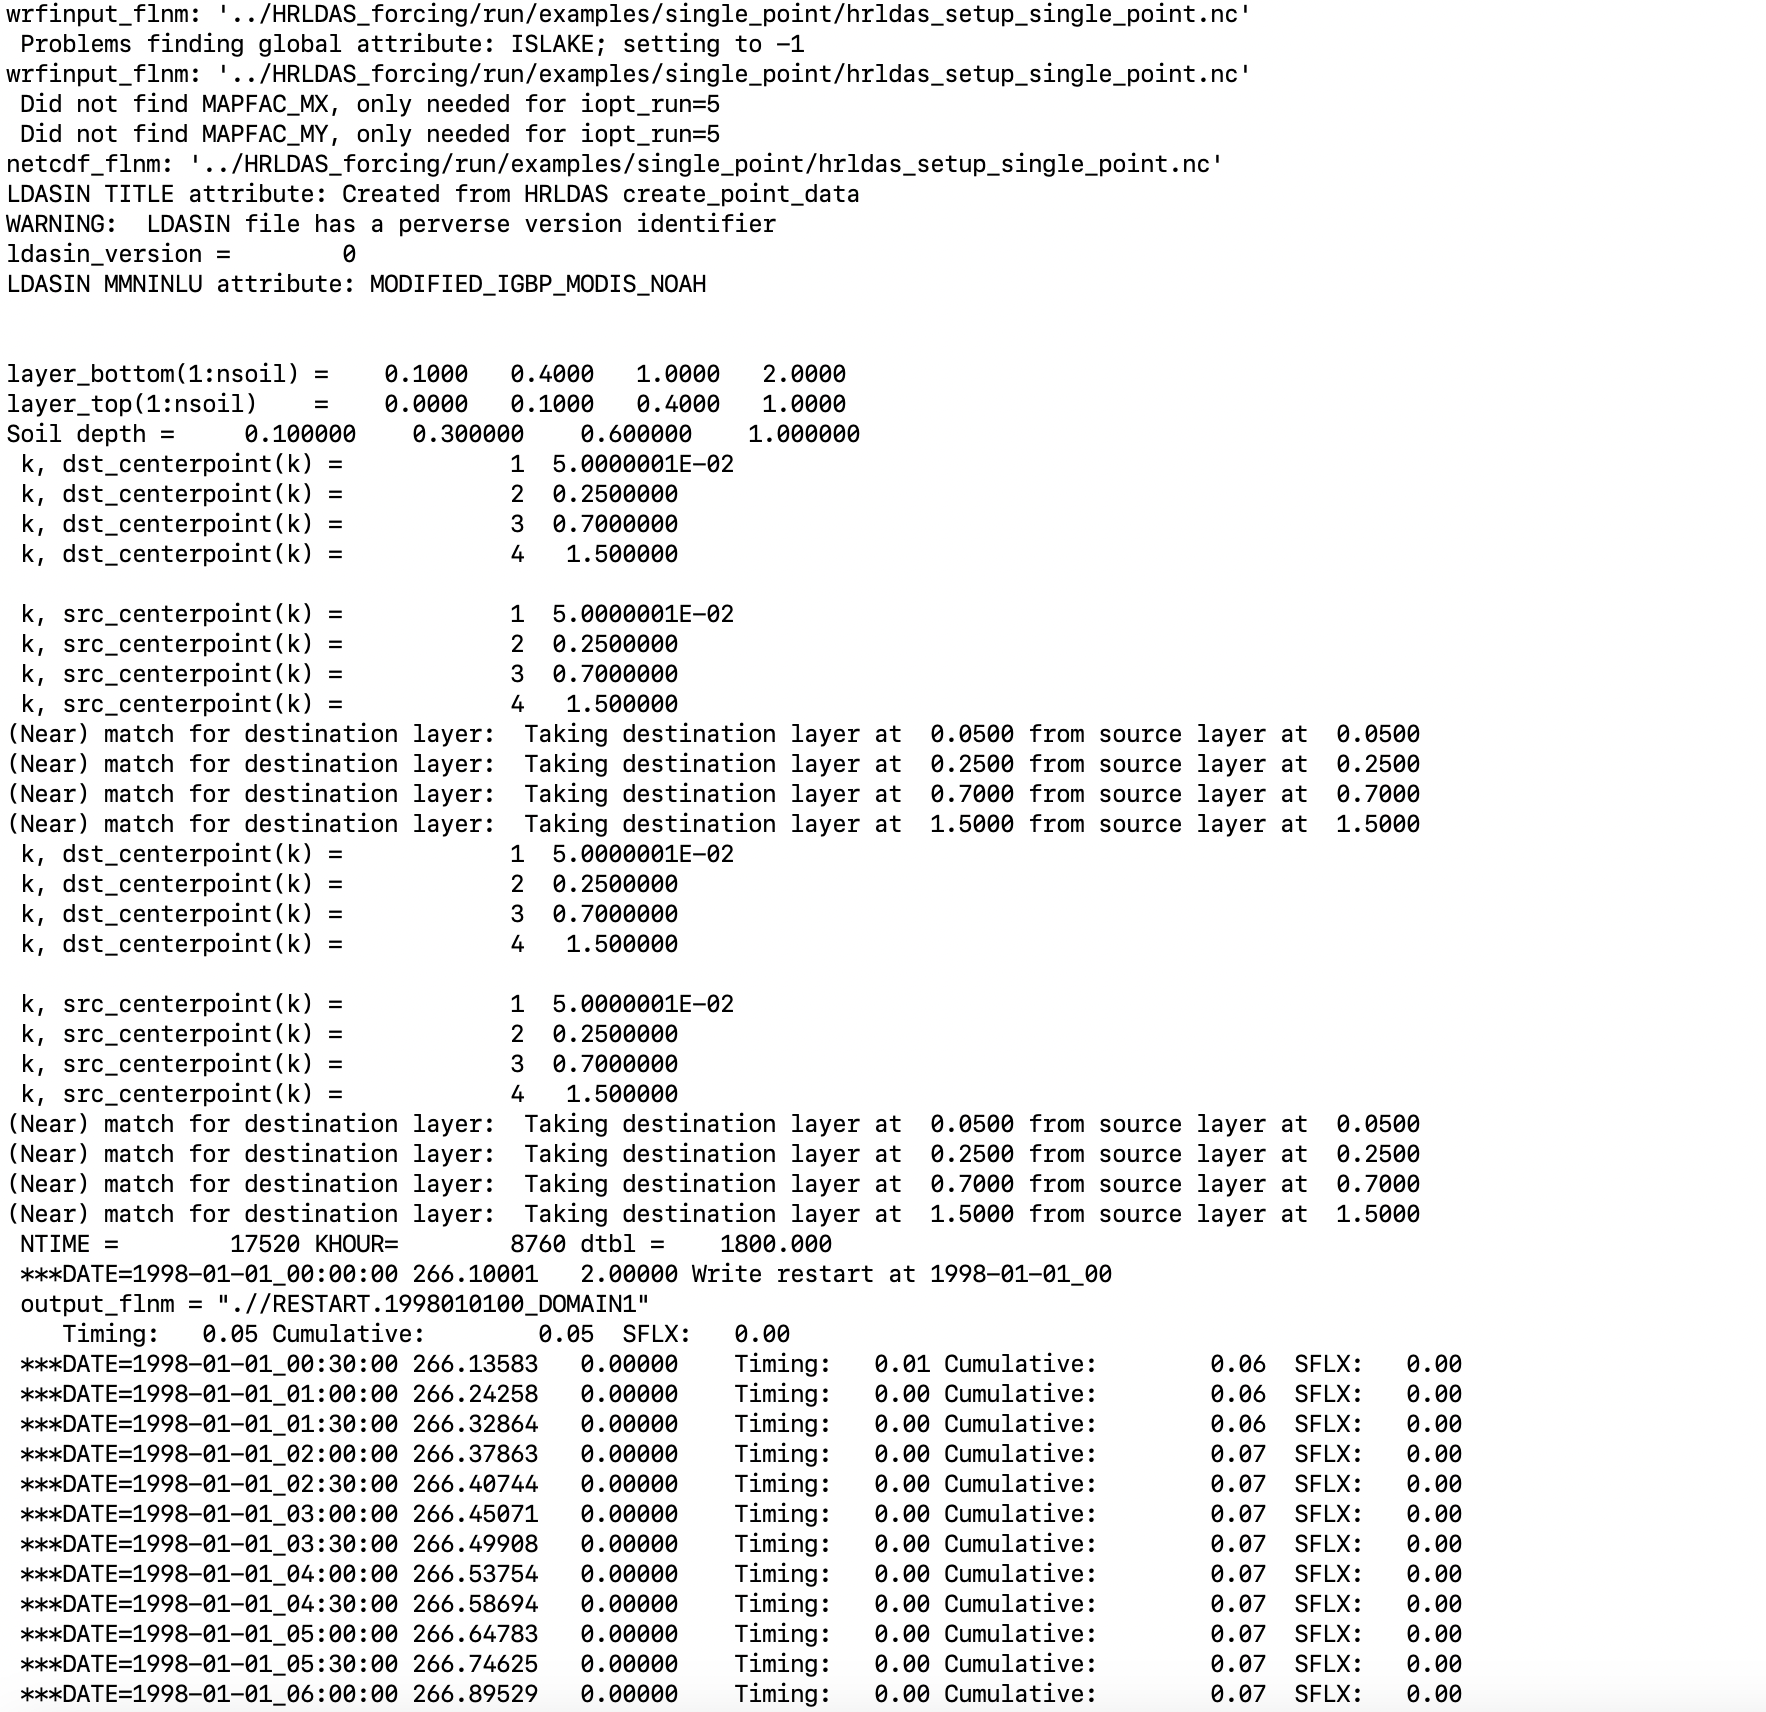
...

(7) **Check model results** 

One way to quickly check model results is use **ncview**:

**ncview 199801010030.LDASOUT_DOMAIN1**

#### Congratulations! You have successfully conducted the single-point simulation. 